# Joint analysis of risk factor clusters and mortality levels
## Workflow: to execute after 06_analysis_risk_factor_measures

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import stats

from util import get_default_colors_heatmap, centimeter_to_inch

## Loading data

In [2]:
year_columns = ['TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020', 'TAXA_OBITOS_2020', 'TAXA_OBITOS_2021', 'TAXA_OBITOS_2022', 'TAXA_OBITOS_ACUMULADO']

df_base = pd.read_csv('data/df_labeled_risk_factors.csv', index_col=0)

df_probability_risk_factors = pd.read_csv('data/df_probability_risk_factors_k_5.csv', index_col=0)

df_mortality = pd.read_csv('../mortality_levels/data/df_mortality.csv', index_col=0)

df_probability_mortality_levels = {}
for year_column in year_columns:
    filename = '../mortality_levels/data/df_probability_levels_' + year_column + '.csv'
    df_probability_mortality_levels[year_column] = pd.read_csv(filename, index_col=0)

In [3]:
df_probability_risk_factors

,0,1,2,3,4
0,8.296115e-02,0.307087,2.113492e-04,7.015334e-13,0.609741
1,4.026609e-07,0.028665,8.940985e-01,9.762568e-34,0.077236
2,7.463967e-06,0.986238,2.924339e-04,1.327404e-29,0.013462
3,1.826149e-08,0.038535,9.398504e-01,2.875213e-39,0.021615
4,2.829231e-06,0.118345,7.088660e-01,2.357328e-31,0.172786
...,...,...,...,...,...
5565,5.166830e-06,0.176738,6.073340e-01,1.342628e-30,0.215923
5566,5.827893e-02,0.039197,9.717150e-04,1.879360e-12,0.901553
5567,8.703685e-01,0.006160,2.662201e-07,2.414566e-05,0.123447
5568,9.647173e-01,0.030549,4.712957e-11,1.754429e-04,0.004559


## Labeling the classes

In [4]:
y_label = [None, None, None, None, None]
k5 = df_base.groupby(['k5', 'k5_label']).count()[[]].reset_index().values
for i in range(len(k5)):
    y_label[k5[i][0]] = k5[i][1]

In [5]:
k5

array([[0, 'High SV'],
       [1, 'Rural with low SV'],
       [2, 'Very low SV'],
       [3, 'Very high SV'],
       [4, 'Intermediate SV']], dtype=object)

In [6]:
y_label

['High SV',
 'Rural with low SV',
 'Very low SV',
 'Very high SV',
 'Intermediate SV']

In [7]:
df_probability_risk_factors.columns = y_label
df_probability_risk_factors

,High SV,Rural with low SV,Very low SV,Very high SV,Intermediate SV
0,8.296115e-02,0.307087,2.113492e-04,7.015334e-13,0.609741
1,4.026609e-07,0.028665,8.940985e-01,9.762568e-34,0.077236
2,7.463967e-06,0.986238,2.924339e-04,1.327404e-29,0.013462
3,1.826149e-08,0.038535,9.398504e-01,2.875213e-39,0.021615
4,2.829231e-06,0.118345,7.088660e-01,2.357328e-31,0.172786
...,...,...,...,...,...
5565,5.166830e-06,0.176738,6.073340e-01,1.342628e-30,0.215923
5566,5.827893e-02,0.039197,9.717150e-04,1.879360e-12,0.901553
5567,8.703685e-01,0.006160,2.662201e-07,2.414566e-05,0.123447
5568,9.647173e-01,0.030549,4.712957e-11,1.754429e-04,0.004559


In [8]:
df_probability_risk_factors = df_probability_risk_factors[['Very low SV', 'Rural with low SV', 'Intermediate SV', 'High SV', "Very high SV"]]
df_probability_risk_factors

,Very low SV,Rural with low SV,Intermediate SV,High SV,Very high SV
0,2.113492e-04,0.307087,0.609741,8.296115e-02,7.015334e-13
1,8.940985e-01,0.028665,0.077236,4.026609e-07,9.762568e-34
2,2.924339e-04,0.986238,0.013462,7.463967e-06,1.327404e-29
3,9.398504e-01,0.038535,0.021615,1.826149e-08,2.875213e-39
4,7.088660e-01,0.118345,0.172786,2.829231e-06,2.357328e-31
...,...,...,...,...,...
5565,6.073340e-01,0.176738,0.215923,5.166830e-06,1.342628e-30
5566,9.717150e-04,0.039197,0.901553,5.827893e-02,1.879360e-12
5567,2.662201e-07,0.006160,0.123447,8.703685e-01,2.414566e-05
5568,4.712957e-11,0.030549,0.004559,9.647173e-01,1.754429e-04


In [9]:
df_probability_risk_factors.to_csv('data/df_probabilidade_fatores_risco_k_5_rotulado.csv', index=True)

map_niveis_mortalidade = {'very_low': 'Very low', 'low': 'Low', 'intermediate': 'Intermediate', 'high': 'High', 'very_high': 'Very high', 'extremely_high': 'Extremely high'}
for year_column in year_columns:
    df_probability_mortality_levels[year_column] = df_probability_mortality_levels[year_column].rename(columns=map_niveis_mortalidade)
    df_probability_mortality_levels[year_column] = df_probability_mortality_levels[year_column][['Very low', 'Low', 'Intermediate', "High", "Very high", "Extremely high"]]

In [10]:
df_probability_mortality_levels[year_columns[3]]

,Very low,Low,Intermediate,High,Very high,Extremely high
0,0.0,2.827487e-04,0.386298,0.595176,0.016125,0.002118
1,0.0,5.098564e-02,0.861210,0.085909,0.001477,0.000418
2,0.0,9.371077e-01,0.061992,0.000824,0.000028,0.000049
3,0.0,4.957041e-01,0.490409,0.013464,0.000261,0.000161
4,0.0,1.550319e-07,0.018698,0.906289,0.068904,0.006110
...,...,...,...,...,...,...
5565,0.0,8.007915e-05,0.254702,0.719703,0.022805,0.002710
5566,0.0,9.881076e-01,0.011704,0.000141,0.000009,0.000039
5567,0.0,1.667727e-03,0.608051,0.380545,0.008407,0.001329
5568,0.0,9.552283e-01,0.044148,0.000559,0.000021,0.000044


## Correlation among probabilities of risk factor cluters and mortality level

In [11]:
columns_risk_factors = df_probability_risk_factors.columns
columns_mortality_levels = df_probability_mortality_levels[year_column].columns

TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020


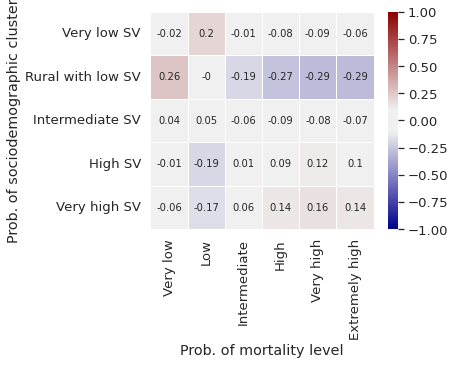

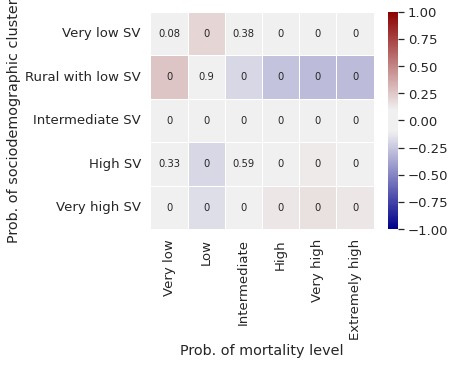

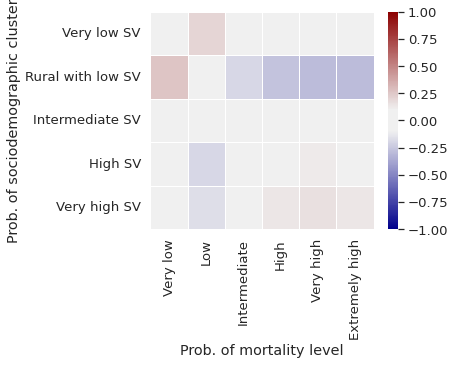

TAXA_OBITOS_2020


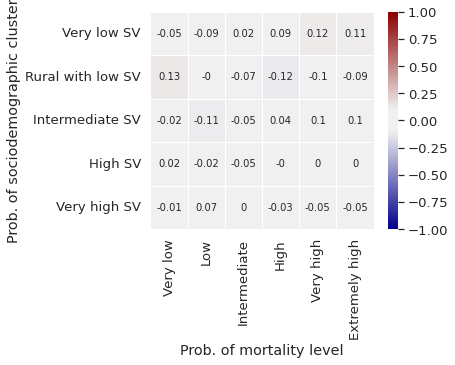

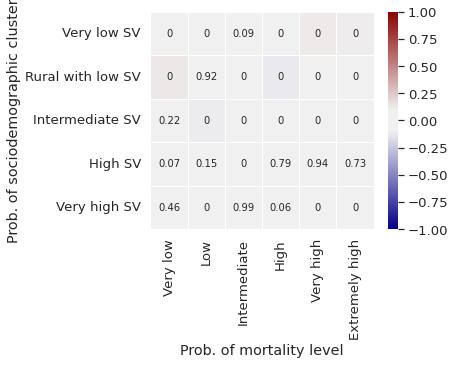

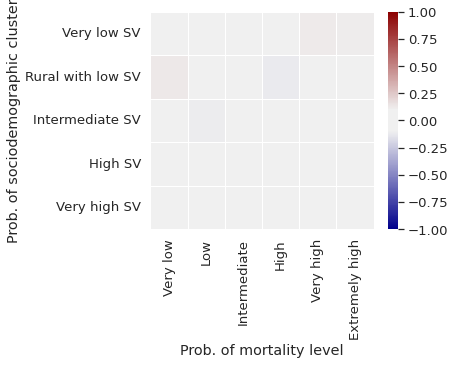

TAXA_OBITOS_2021


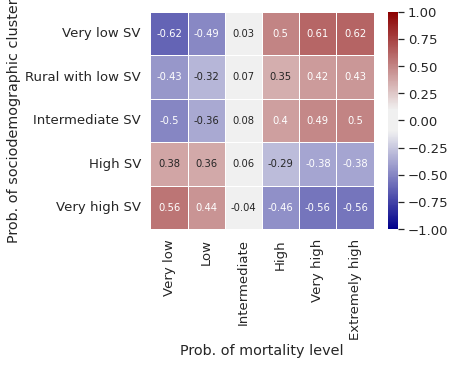

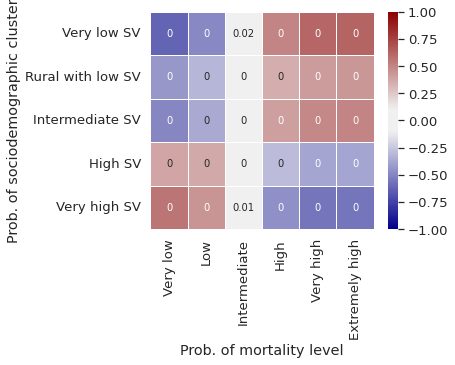

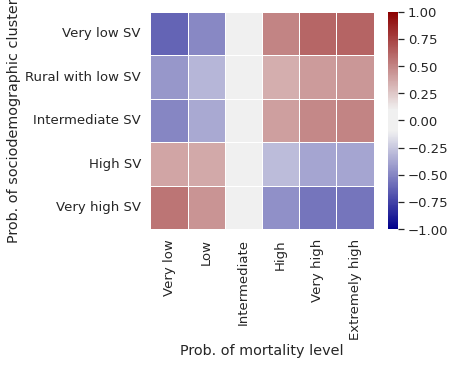

TAXA_OBITOS_2022


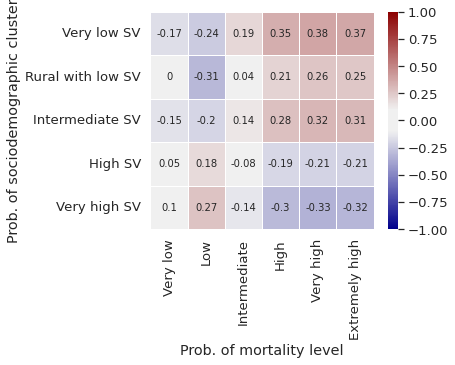

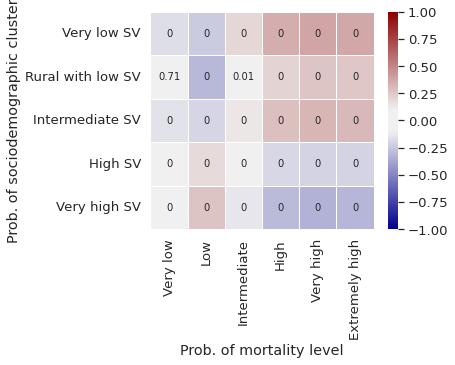

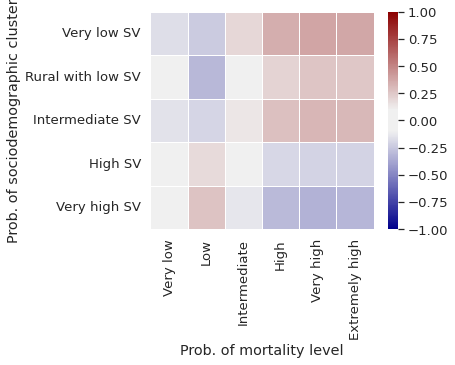

TAXA_OBITOS_ACUMULADO


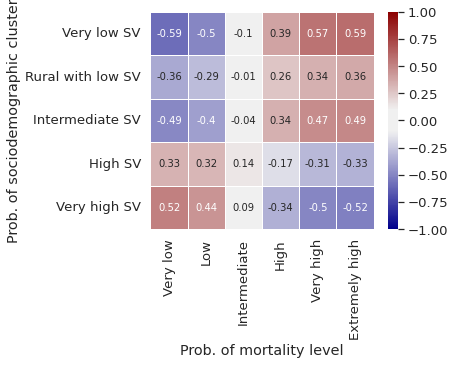

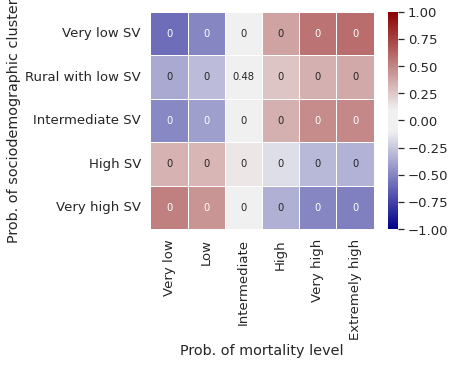

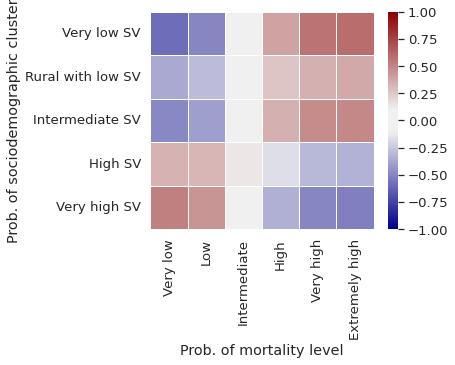

In [12]:
palette = get_default_colors_heatmap()
sns.set(font_scale=1.2)

correlation_plot_data_joined = None

for year_column in year_columns:
    k = 5
    print(year_column)
    df_combined = pd.merge(df_probability_risk_factors, df_probability_mortality_levels[year_column], left_index=True, right_index=True)
    correlation, pvalue = spearmanr(df_combined)
    correlation = correlation.round(2)
    pvalue = pvalue.round(2)
    correlation_plot_data = correlation[:k][:,k:]
    pvalue_plot_data = pvalue[:k][:,k:]

    if correlation_plot_data_joined is None:
        correlation_plot_data_joined = correlation_plot_data
    else:
        correlation_plot_data_joined = np.concatenate((correlation_plot_data_joined, correlation_plot_data), axis=1)

    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(correlation_plot_data, cmap=palette, linewidths=.7, annot=correlation_plot_data, yticklabels=columns_risk_factors, xticklabels=columns_mortality_levels, vmin=-1, vmax=1)
    plt.xlabel('Prob. of mortality level')
    plt.ylabel('Prob. of sociodemographic cluster')
    plt.show()

    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(correlation_plot_data, cmap=palette, linewidths=.7, annot=pvalue_plot_data, yticklabels=columns_risk_factors, xticklabels=columns_mortality_levels, vmin=-1, vmax=1)
    plt.xlabel('Prob. of mortality level')
    plt.ylabel('Prob. of sociodemographic cluster')
    plt.show()

    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(correlation_plot_data, cmap=palette, linewidths=.7, annot=False, yticklabels=columns_risk_factors, xticklabels=columns_mortality_levels, vmin=-1, vmax=1)
    plt.xlabel('Prob. of mortality level')
    plt.ylabel('Prob. of sociodemographic cluster')
    plt.show()

In [13]:
joined_motality_level_columns = np.concatenate((columns_mortality_levels, columns_mortality_levels, columns_mortality_levels, columns_mortality_levels, columns_mortality_levels))
joined_motality_level_columns

array(['Very low', 'Low', 'Intermediate', 'High', 'Very high',
       'Extremely high', 'Very low', 'Low', 'Intermediate', 'High',
       'Very high', 'Extremely high', 'Very low', 'Low', 'Intermediate',
       'High', 'Very high', 'Extremely high', 'Very low', 'Low',
       'Intermediate', 'High', 'Very high', 'Extremely high', 'Very low',
       'Low', 'Intermediate', 'High', 'Very high', 'Extremely high'],
      dtype=object)

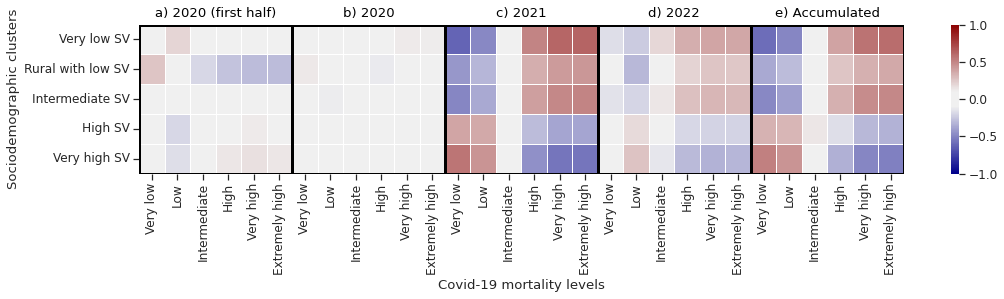

In [14]:
sns.set(font_scale=1.1)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(centimeter_to_inch(43.5), centimeter_to_inch(6.96)))
sns.heatmap(correlation_plot_data_joined, cmap=palette, linewidths=.7, annot=False, yticklabels=columns_risk_factors,
            xticklabels=joined_motality_level_columns, vmin=-1, vmax=1)
plt.xlabel('Covid-19 mortality levels')
plt.ylabel('Sociodemographic clusters')

from matplotlib.patches import Rectangle

ax.add_patch(Rectangle((0, 0), 6, 5, fill=False, edgecolor='black', lw=3))
ax.annotate('a) 2020 (first half)', xy=(3, 1.05), xycoords=("data", "axes fraction"), color='black', ha='center')

ax.add_patch(Rectangle((6, 0), 6, 5, fill=False, edgecolor='black', lw=3))
ax.annotate('b) 2020', xy=(9, 1.05), xycoords=("data", "axes fraction"), color='black', ha='center')

ax.add_patch(Rectangle((12, 0), 6, 5, fill=False, edgecolor='black', lw=3))
ax.annotate('c) 2021', xy=(15, 1.05), xycoords=("data", "axes fraction"), color='black', ha='center')

ax.add_patch(Rectangle((18, 0), 6, 5, fill=False, edgecolor='black', lw=3))
ax.annotate('d) 2022', xy=(21, 1.05), xycoords=("data", "axes fraction"), color='black', ha='center')

ax.add_patch(Rectangle((24, 0), 6, 5, fill=False, edgecolor='black', lw=3))
ax.annotate('e) Accumulated', xy=(27, 1.05), xycoords=("data", "axes fraction"), color='black', ha='center')

fig.savefig('images/heatmap_clusters_and_motality_levels.eps', bbox_inches="tight")
fig.savefig('images/heatmap_clusters_and_motality_levels.pdf', bbox_inches="tight")

plt.show()

## Checking correlations

### Sociodemographic clusters and mortality levels

In [15]:
dict_validation = {}
consequents = ['High, very high or extremely high']
antecedents = ['Very low SV', 'Rural with low SV', 'Intermediate SV', 'High SV', "Very high SV"]

df_general_validation = pd.DataFrame({'Antecedent': antecedents})

for year_column in year_columns:
    print(year_column)
    column_group = 'k5_label'
    mortality_level_column = 'NIVEL_LABEL_' + year_column
    df_combined = pd.merge(df_base[column_group], df_mortality[[mortality_level_column]], left_index=True, right_index=True)
    df_combined = df_combined.rename(columns={mortality_level_column: 'mortality_level_label'})
    df_combined = df_combined[[column_group,'mortality_level_label']]
    df_combined['util_to_count'] = 1
    df_grouped = df_combined.groupby([column_group, 'mortality_level_label']).count()
    df_grouped = df_grouped.reset_index()
    df_grouped = df_grouped.pivot_table('util_to_count', [column_group], 'mortality_level_label')
    df_grouped = df_grouped.reset_index()
    df_grouped = df_grouped.fillna(0)
    df_grouped['total'] = df_grouped['High'] + df_grouped['Low'] + df_grouped['Very high'] + df_grouped['Very low'] + df_grouped['Intermediate'] + df_grouped['Extremely high']
    df_grouped['High, very high or extremely high'] = df_grouped['High'] + df_grouped['Very high'] + df_grouped['Extremely high']

    df_validation = pd.DataFrame(columns=['Antecedent', year_column + ' - Odds ratio', year_column + ' - p-value'])

    for antecedent in antecedents:
        print(antecedent)
        for consequent in consequents:
            print(consequent)
            a = df_grouped[df_grouped[column_group] == antecedent][consequent].values[0]
            b = df_grouped[df_grouped[column_group] == antecedent]['total'].values[0] - a
            c = df_grouped[consequent].sum() - a
            d = df_grouped['total'].sum() - a - b - c
            true_table = [[a, b], [c, d]]
            print(true_table)
            oddsratio, pvalue = stats.fisher_exact(true_table)
            df_validation = df_validation.append({'Antecedent': antecedent, year_column + ' - Odds ratio': round(oddsratio, 2), year_column + ' - p-value': round(pvalue, 3)}, ignore_index=True)
            filename = 'data/table_check_correlations_' + year_column + '.csv'
            df_validation.to_csv(filename, index=False)

    df_general_validation = df_general_validation.merge(df_validation, left_on='Antecedent', right_on='Antecedent', how='left')

    dict_validation[year_column] = df_validation

df_general_validation.to_csv('data/table_check_correlations.csv', index=False)
df_general_validation

TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020
Very low SV
High, very high or extremely high
[[76, 1100], [610, 3779]]
Rural with low SV
High, very high or extremely high
[[20, 805], [666, 4074]]
Intermediate SV
High, very high or extremely high
[[124, 824], [562, 4055]]
High SV
High, very high or extremely high
[[191, 887], [495, 3992]]
Very high SV
High, very high or extremely high
[[275, 1263], [411, 3616]]
TAXA_OBITOS_2020
Very low SV
High, very high or extremely high
[[414, 762], [1309, 3080]]
Rural with low SV
High, very high or extremely high
[[145, 680], [1578, 3162]]
Intermediate SV
High, very high or extremely high
[[364, 584], [1359, 3258]]
High SV
High, very high or extremely high
[[382, 696], [1341, 3146]]
Very high SV
High, very high or extremely high
[[418, 1120], [1305, 2722]]
TAXA_OBITOS_2021
Very low SV
High, very high or extremely high
[[785, 391], [1106, 3283]]
Rural with low SV
High, very high or extremely high
[[325, 500], [1566, 3174]]
Intermediate SV
High, very high or extr

,Antecedent,TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020 - Odds ratio,TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020 - p-value,TAXA_OBITOS_2020 - Odds ratio,TAXA_OBITOS_2020 - p-value,TAXA_OBITOS_2021 - Odds ratio,TAXA_OBITOS_2021 - p-value,TAXA_OBITOS_2022 - Odds ratio,TAXA_OBITOS_2022 - p-value,TAXA_OBITOS_ACUMULADO - Odds ratio,TAXA_OBITOS_ACUMULADO - p-value
0,Very low SV,0.43,0.000,1.28,0.0,5.96,0.0,2.15,0.0,5.69,0.000
1,Rural with low SV,0.15,0.000,0.43,0.0,1.32,0.0,1.60,0.0,1.02,0.847
2,Intermediate SV,1.09,0.448,1.49,0.0,2.42,0.0,1.92,0.0,2.67,0.000
3,High SV,1.74,0.000,1.29,0.0,0.40,0.0,0.61,0.0,0.55,0.000
4,Very high SV,1.92,0.000,0.78,0.0,0.07,0.0,0.18,0.0,0.11,0.000


### Regions and mortality levels

In [16]:
df_base.REGIAO_EN.unique().tolist()

['Midwestern', 'Southeast', 'Northeast', 'South', 'North']

In [17]:
dict_validation = {}
consequents = ['High, very high or extremely high']
antecedents = df_base.REGIAO_EN.unique().tolist()

df_general_validation = pd.DataFrame({'Antecedent': antecedents})

for year_column in year_columns:
    print(year_column)
    column_group = 'REGIAO_EN'
    mortality_level_column = 'NIVEL_LABEL_' + year_column
    df_combined = pd.merge(df_base[column_group], df_mortality[[mortality_level_column]], left_index=True, right_index=True)
    df_combined = df_combined.rename(columns={mortality_level_column: 'mortality_level_label'})
    df_combined = df_combined[[column_group,'mortality_level_label']]
    df_combined['util_to_count'] = 1
    df_grouped = df_combined.groupby([column_group, 'mortality_level_label']).count()
    df_grouped = df_grouped.reset_index()
    df_grouped = df_grouped.pivot_table('util_to_count', [column_group], 'mortality_level_label')
    df_grouped = df_grouped.reset_index()
    df_grouped = df_grouped.fillna(0)
    df_grouped['total'] = df_grouped['High'] + df_grouped['Low'] + df_grouped['Very high'] + df_grouped['Very low'] + df_grouped['Intermediate'] + df_grouped['Extremely high']
    df_grouped['High, very high or extremely high'] = df_grouped['High'] + df_grouped['Very high'] + df_grouped['Extremely high']

    df_validation = pd.DataFrame(columns=['Antecedent', year_column + ' - Odds ratio', year_column + ' - p-value'])

    for antecedent in antecedents:
        print(antecedent)
        for consequent in consequents:
            print(consequent)
            a = df_grouped[df_grouped[column_group] == antecedent][consequent].values[0]
            b = df_grouped[df_grouped[column_group] == antecedent]['total'].values[0] - a
            c = df_grouped[consequent].sum() - a
            d = df_grouped['total'].sum() - a - b - c
            true_table = [[a, b], [c, d]]
            print(true_table)
            oddsratio, pvalue = stats.fisher_exact(true_table)
            df_validation = df_validation.append({'Antecedent': antecedent, year_column + ' - Odds ratio': round(oddsratio, 2), year_column + ' - p-value': round(pvalue, 3)}, ignore_index=True)
            filename = 'data/table_check_correlations_regions_' + year_column + '.csv'
            df_validation.to_csv(filename, index=False)

    df_general_validation = df_general_validation.merge(df_validation, left_on='Antecedent', right_on='Antecedent', how='left')

    dict_validation[year_column] = df_validation

df_general_validation.to_csv('data/table_check_correlations_regions_.csv', index=False)
df_general_validation

TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020
Midwestern
High, very high or extremely high
[[19.0, 447.0], [667.0, 4432.0]]
Southeast
High, very high or extremely high
[[128.0, 1540.0], [558.0, 3339.0]]
Northeast
High, very high or extremely high
[[374.0, 1420.0], [312.0, 3459.0]]
South
High, very high or extremely high
[[24.0, 1164.0], [662.0, 3715.0]]
North
High, very high or extremely high
[[141.0, 308.0], [545.0, 4571.0]]
TAXA_OBITOS_2020
Midwestern
High, very high or extremely high
[[171, 295], [1552, 3547]]
Southeast
High, very high or extremely high
[[501, 1167], [1222, 2675]]
Northeast
High, very high or extremely high
[[584, 1210], [1139, 2632]]
South
High, very high or extremely high
[[276, 912], [1447, 2930]]
North
High, very high or extremely high
[[191, 258], [1532, 3584]]
TAXA_OBITOS_2021
Midwestern
High, very high or extremely high
[[260.0, 206.0], [1631.0, 3468.0]]
Southeast
High, very high or extremely high
[[874.0, 794.0], [1017.0, 2880.0]]
Northeast
High, very high or extremely

,Antecedent,TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020 - Odds ratio,TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020 - p-value,TAXA_OBITOS_2020 - Odds ratio,TAXA_OBITOS_2020 - p-value,TAXA_OBITOS_2021 - Odds ratio,TAXA_OBITOS_2021 - p-value,TAXA_OBITOS_2022 - Odds ratio,TAXA_OBITOS_2022 - p-value,TAXA_OBITOS_ACUMULADO - Odds ratio,TAXA_OBITOS_ACUMULADO - p-value
0,Midwestern,0.28,0.0,1.32,0.006,2.68,0.0,1.27,0.051,2.72,0.0
1,Southeast,0.50,0.0,0.94,0.342,3.12,0.0,3.12,0.000,3.00,0.0
2,Northeast,2.92,0.0,1.12,0.077,0.05,0.0,0.17,0.000,0.13,0.0
3,South,0.12,0.0,0.61,0.000,2.17,0.0,1.38,0.000,1.69,0.0
4,North,3.84,0.0,1.73,0.000,0.54,0.0,0.37,0.000,0.54,0.0


### Metropolitan region

In [18]:
df_base.REGIAO_METROPOLITANA.unique().tolist()

[1.0, 0.0]

In [20]:
dict_validation = {}
consequents = ['High, very high or extremely high']
antecedents = df_base.REGIAO_METROPOLITANA.unique().tolist()

df_general_validation = pd.DataFrame({'Antecedent': antecedents})

for year_column in year_columns:
    print(year_column)
    column_group = 'REGIAO_METROPOLITANA'
    mortality_level_column = 'NIVEL_LABEL_' + year_column
    df_combined = pd.merge(df_base[column_group], df_mortality[[mortality_level_column]], left_index=True, right_index=True)
    df_combined = df_combined.rename(columns={mortality_level_column: 'mortality_level_label'})
    df_combined = df_combined[[column_group,'mortality_level_label']]
    df_combined['util_to_count'] = 1
    df_grouped = df_combined.groupby([column_group, 'mortality_level_label']).count()
    df_grouped = df_grouped.reset_index()
    df_grouped = df_grouped.pivot_table('util_to_count', [column_group], 'mortality_level_label')
    df_grouped = df_grouped.reset_index()
    df_grouped = df_grouped.fillna(0)
    df_grouped['total'] = df_grouped['High'] + df_grouped['Low'] + df_grouped['Very high'] + df_grouped['Very low'] + df_grouped['Intermediate'] + df_grouped['Extremely high']
    df_grouped['High, very high or extremely high'] = df_grouped['High'] + df_grouped['Very high'] + df_grouped['Extremely high']

    df_validation = pd.DataFrame(columns=['Antecedent', year_column + ' - Odds ratio', year_column + ' - p-value'])

    for antecedent in antecedents:
        print(antecedent)
        for consequent in consequents:
            print(consequent)
            a = df_grouped[df_grouped[column_group] == antecedent][consequent].values[0]
            b = df_grouped[df_grouped[column_group] == antecedent]['total'].values[0] - a
            c = df_grouped[consequent].sum() - a
            d = df_grouped['total'].sum() - a - b - c
            true_table = [[a, b], [c, d]]
            print(true_table)
            oddsratio, pvalue = stats.fisher_exact(true_table)
            df_validation = df_validation.append({'Antecedent': antecedent, year_column + ' - Odds ratio': round(oddsratio, 2), year_column + ' - p-value': round(pvalue, 3)}, ignore_index=True)
            filename = 'data/table_check_correlations_metropolitan_regions_' + year_column + '.csv'
            df_validation.to_csv(filename, index=False)

    df_general_validation = df_general_validation.merge(df_validation, left_on='Antecedent', right_on='Antecedent', how='left')

    dict_validation[year_column] = df_validation

df_general_validation.to_csv('data/table_check_correlations_metropolitan_regions.csv', index=False)
df_general_validation

TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020
1.0
High, very high or extremely high
[[156, 230], [530, 4649]]
0.0
High, very high or extremely high
[[530, 4649], [156, 230]]
TAXA_OBITOS_2020
1.0
High, very high or extremely high
[[241, 145], [1482, 3697]]
0.0
High, very high or extremely high
[[1482, 3697], [241, 145]]
TAXA_OBITOS_2021
1.0
High, very high or extremely high
[[176, 210], [1715, 3464]]
0.0
High, very high or extremely high
[[1715, 3464], [176, 210]]
TAXA_OBITOS_2022
1.0
High, very high or extremely high
[[25.0, 361.0], [980.0, 4199.0]]
0.0
High, very high or extremely high
[[980.0, 4199.0], [25.0, 361.0]]
TAXA_OBITOS_ACUMULADO
1.0
High, very high or extremely high
[[229, 157], [1951, 3228]]
0.0
High, very high or extremely high
[[1951, 3228], [229, 157]]


,Antecedent,TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020 - Odds ratio,TAXA_OBITOS_PRIMEIRO_SEMESTRE_2020 - p-value,TAXA_OBITOS_2020 - Odds ratio,TAXA_OBITOS_2020 - p-value,TAXA_OBITOS_2021 - Odds ratio,TAXA_OBITOS_2021 - p-value,TAXA_OBITOS_2022 - Odds ratio,TAXA_OBITOS_2022 - p-value,TAXA_OBITOS_ACUMULADO - Odds ratio,TAXA_OBITOS_ACUMULADO - p-value
0,1.0,5.95,0.0,4.15,0.0,1.69,0.0,0.30,0.0,2.41,0.0
1,0.0,0.17,0.0,0.24,0.0,0.59,0.0,3.37,0.0,0.41,0.0
